In [1]:
%cd ..

/home/jovyan/HyperDomainNet


In [2]:
import torch
import matplotlib.pyplot as plt

from core.utils.common import mixing_noise
from core.utils.image_utils import construct_paper_image_grid
from core.utils.example_utils import Inferencer

In [3]:
checkpoints = {
    'im2im': {
        'anastasia': 'im2im_checkpoints/im2im_anastasia.pt',
        'digital_painting_jing': 'im2im_checkpoints/im2im_digital_painting_jing.pt',
        'mermaid': 'im2im_checkpoints/im2im_mermaid.pt',
        'sketch': 'im2im_checkpoints/im2im_sketch.pt',
        'speed_paint': 'im2im_checkpoints/im2im_speed_paint.pt',
        'titan_armin': 'im2im_checkpoints/im2im_titan_armin.pt',
        'titan_erwin': 'im2im_checkpoints/im2im_titan_erwin.pt',
    },
    'td': {
        'anime': 'td_checkpoints/td_anime.pt',
        'monalisa': 'td_checkpoints/td_monalisa.pt',
        'pixar': 'td_checkpoints/td_pixar.pt',
        'sketch': 'td_checkpoints/td_sketch.pt',
        'ukiyo-e': 'td_checkpoints/td_ukiyo-e.pt',
        'botero': 'td_checkpoints/td_botero.pt',
        'werewolf': 'td_checkpoints/td_werewolf.pt',
        'zombie': 'td_checkpoints/td_joker.pt',
        'joker': 'td_checkpoints/td_neanderthal.pt'
    },
    'mapper_20_td': 'mapper_20_td.pt',
    'mapper_large_td': 'mapper_large_resample_td.pt'
}

In [4]:
device = 'cuda:0'

In [5]:
da_type = 'im2im'
target_domain = 'anastasia'

ckpt_path = f'checkpoints/{checkpoints[da_type][target_domain]}'
ckpt = torch.load(ckpt_path, map_location='cpu')

In [6]:
model = Inferencer(ckpt, device)

In [7]:
z = mixing_noise(
    16, 512, 0, device
)

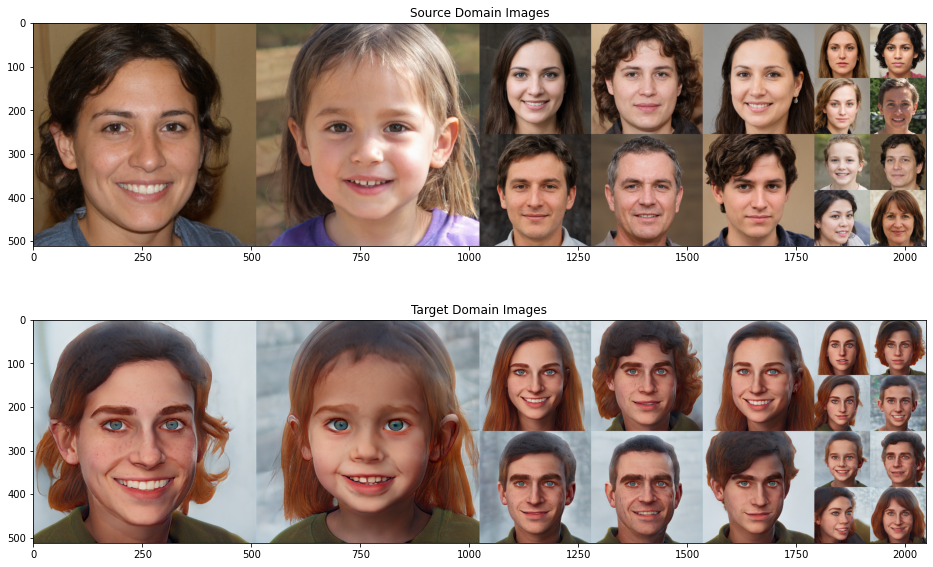

In [8]:
src_im, trg_im = model(z, truncation=0.5)

src_im = construct_paper_image_grid(src_im)
trg_im = construct_paper_image_grid(trg_im)

fig, ax = plt.subplots(2, 1, figsize=(16, 8))

ax[0].axis('off')
ax[0].imshow(src_im)
ax[0].set_title('Source Domain Images')
ax[1].axis('off')
ax[1].imshow(trg_im)
ax[1].set_title('Target Domain Images')

plt.show()

In [28]:
da_type = 'td'
target_domain = 'anime'

ckpt_path = f'checkpoints/{checkpoints[da_type][target_domain]}'
ckpt = torch.load(ckpt_path, map_location='cpu')

In [29]:
model = Inferencer(ckpt, device)

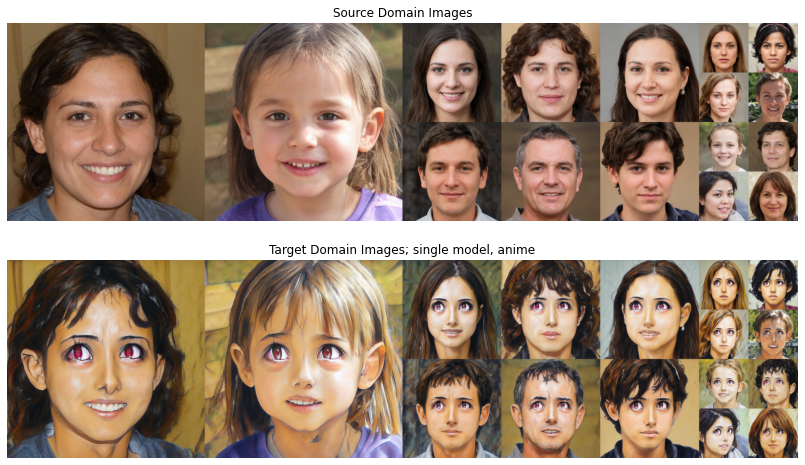

In [32]:
src_im, trg_im = model(z, truncation=0.5)

src_im = construct_paper_image_grid(src_im)
trg_im = construct_paper_image_grid(trg_im)

fig, ax = plt.subplots(2, 1, figsize=(16, 8))

ax[0].axis('off')
ax[0].imshow(src_im)
ax[0].set_title('Source Domain Images')
ax[1].axis('off')
ax[1].imshow(trg_im)
ax[1].set_title(f'Target Domain Images; single model, {target_domain}')

plt.show()

In [12]:
ckpt_path = 'checkpoints/mapper_20_td.pt'
ckpt = torch.load(ckpt_path, map_location='cpu')

In [13]:
model = Inferencer(ckpt, device)

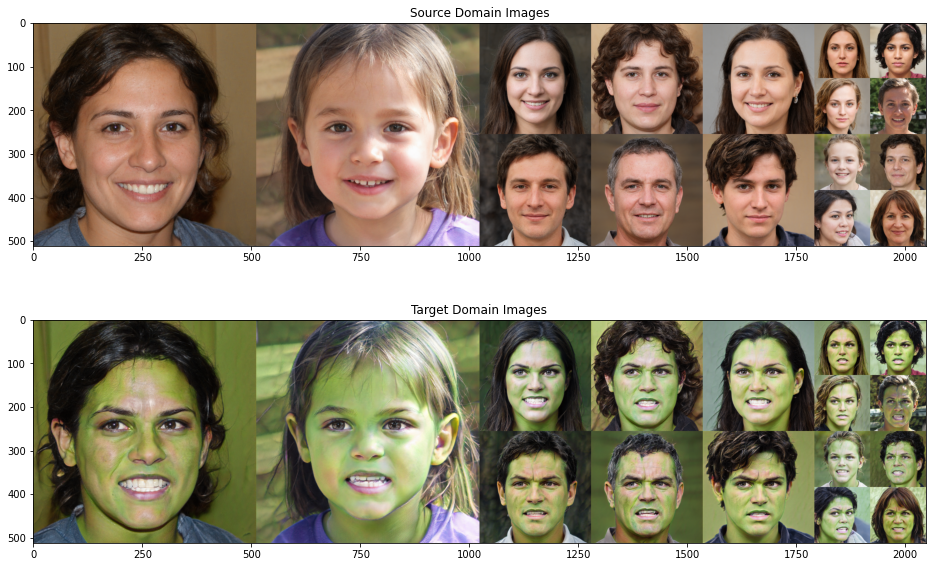

In [16]:
src_im, trg_im = model(z, text_description='Hulk Anime style', truncation=0.5)

src_im = construct_paper_image_grid(src_im)
trg_im = construct_paper_image_grid(trg_im)

fig, ax = plt.subplots(2, 1, figsize=(16, 10))

ax[0].axis('off')
ax[0].imshow(src_im)
ax[0].set_title('Source Domain Images')
ax[1].axis('off')
ax[1].imshow(trg_im)
ax[1].set_title('Target Domain Images')

plt.show()

In [17]:
ckpt_path = 'checkpoints/mapper_large_resample_td.pt'
ckpt = torch.load(ckpt_path, map_location='cpu')

In [18]:
model = Inferencer(ckpt, device)

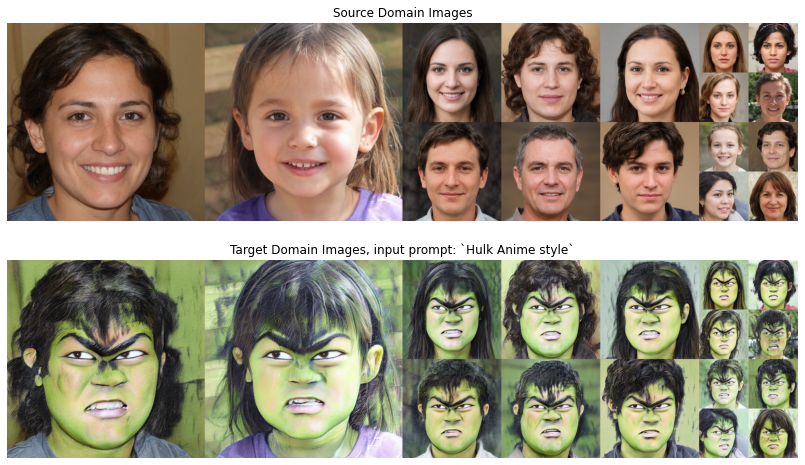

In [26]:
td_prompt = 'Hulk Anime style'

src_im, trg_im = model(z, text_description=td_prompt, truncation=0.5)

src_im = construct_paper_image_grid(src_im)
trg_im = construct_paper_image_grid(trg_im)

fig, ax = plt.subplots(2, 1, figsize=(16, 8))
ax[0].axis('off')
ax[0].imshow(src_im)
ax[0].set_title('Source Domain Images')
ax[1].axis('off')
ax[1].imshow(trg_im)
ax[1].set_title(f'Target Domain Images, input prompt: `{td_prompt}`')
plt.show()